In [3]:
from sklearn.datasets import make_blobs #数据生成器
from sklearn.neighbors import KNeighborsClassifier # KNN 分类器
import matplotlib.pyplot as plt # 画图工具
from sklearn.model_selection import train_test_split # 数据集拆分

X.shape=(200, 2), (200,)
[[ 6.75445054  9.74531933]
 [ 6.80526026 -0.2909292 ]
 [ 7.07978644  7.81427747]
 [ 6.87472003 -0.16069949]
 [ 8.06164078  8.43736968]]
[0 1 0 1 0]


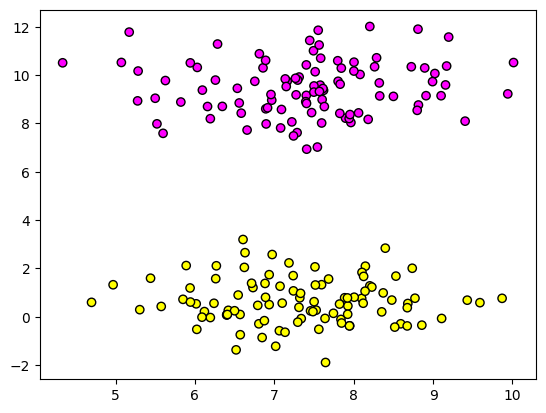

In [4]:
# 生成样本数为200，分类数为2的数据集 默认情况下返回一个元组，(X，y), X是样本数据，y是标签数据
data = make_blobs(n_samples=200, centers=2, random_state=8)
X, y = data
print(f"{X.shape=}, {y.shape}")
print(X[:5])
print(y[:5])
# 将生成的数据可视化
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.spring, edgecolors='k')
plt.show()

`make_blobs` 函数定义如下

```python
def make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
):
    """Generate isotropic Gaussian blobs for clustering.
    为聚类生成各向同性的高斯斑点。

    Parameters
    ----------
    n_samples : int or array-like, default=100
        如果是整数，则表示在簇之间均匀分配的总点数。
        如果类似于数组，序列的每个元素表示每个簇中的样本数量。

    n_features : int, default=2
        每个样本的特征数量。

    centers : int or array-like of shape (n_centers, n_features), default=None
       生成的中心数量，或者固定的中心位置。
       如果n_samples是一个整数并且centers为None，则生成3个中心。
       如果n_samples是类似数组的对象，则centers必须为None或长度等于n_samples长度的数组。

    cluster_std : float or array-like of float, default=1.0
        聚类的标准差。

    center_box : tuple of float (min, max), default=(-10.0, 10.0)
        当中心点随机生成时，每个聚类中心的边界框。

    shuffle : bool, default=True
        是否打乱样本

    random_state : int, RandomState instance or None, default=None
        确定数据集创建的随机数生成。传递一个整数以在多个函数调用中获得可重复的输出。

    return_centers : bool, default=False
        如果为真，则返回每个聚类的中心。
    Returns
    -------
    X : ndarray of shape (n_samples, n_features)
        生成的样本

    y : ndarray of shape (n_samples,)
        每个样本的聚类成员的整数标签。

    centers : ndarray of shape (n_centers, n_features)
        每个簇的中心。仅在“return_centers=True”时返回。

    See Also
    --------
    make_classification : A more intricate variant.

    Examples
    --------
    >>> from sklearn.datasets import make_blobs
    >>> X, y = make_blobs(n_samples=10, centers=3, n_features=2,
    ...                   random_state=0)
    >>> print(X.shape)
    (10, 2)
    >>> y
    array([0, 0, 1, 0, 2, 2, 2, 1, 1, 0])
    >>> X, y = make_blobs(n_samples=[3, 3, 4], centers=None, n_features=2,
    ...                   random_state=0)
    >>> print(X.shape)
    (10, 2)
    >>> y
    array([0, 1, 2, 0, 2, 2, 2, 1, 1, 0])
    """
```


`plt.scatter` 函数

> `scatter` 函数用来生成一个 scatter 散点图
> 
> ```python
> plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.spring,edgecolors='k')
> ```
>
>`X[:,0]`,`X[:,1]`是参数 `X`, `y` 用来规定 `shape` 的大小，也就是点的大小
>
>`c = y`: c代表点的颜色，y代表黄色
>
>`camp`: 标量或者 colormap 的名字；`.cm`是 `matplotlib` 中的色彩映射函数，`spring` 类似于紫色。
>
>`edgecolors = 'k'` 边缘线的颜色为黑色
>
>颜色：`b=blue`, `k=black`, `y=yellow`...

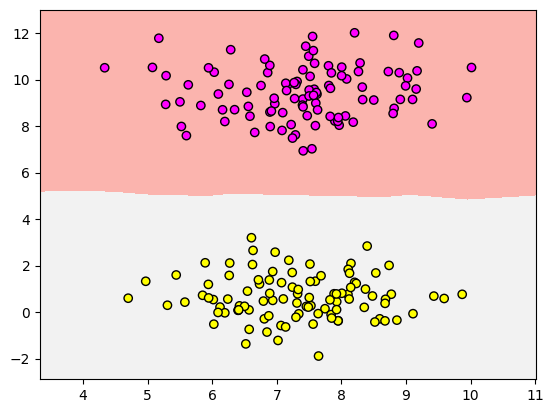

In [12]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X, y)


# 下面的代码用于画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1) # 这个pastel1最后面是数字1不是字母l
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

TypeError: scatter() got multiple values for argument 's'

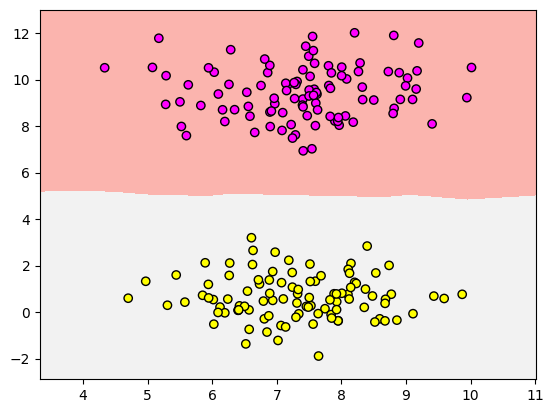

In [14]:
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1) # 这个pastel1最后面是数字1不是字母l
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 把新的点用五角星表示出来
plt.scatter(6,75, 4.82, marker="*", c='red', s=200)

plt.show()